In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Plot all in './Out'

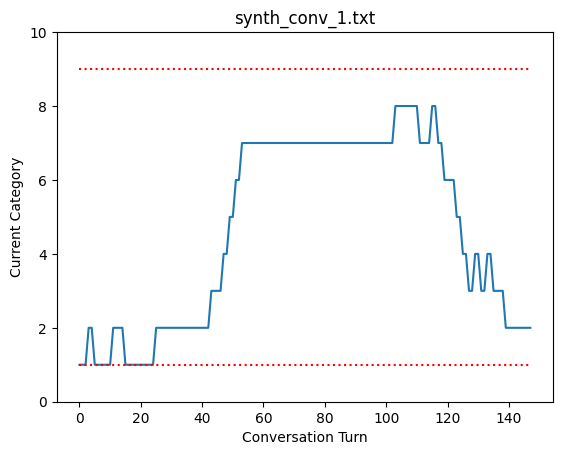

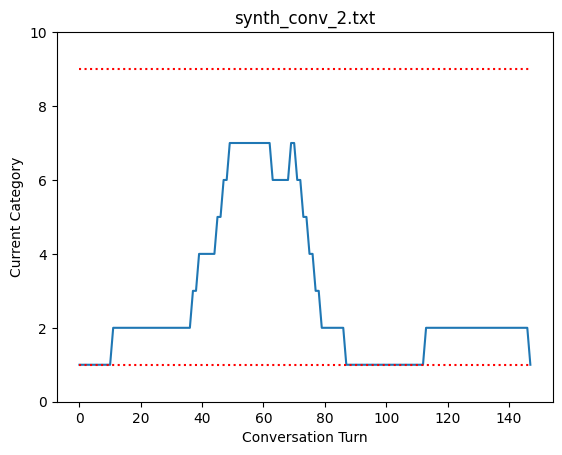

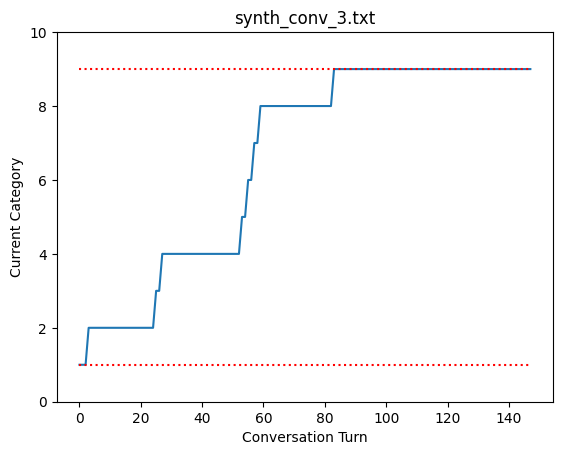

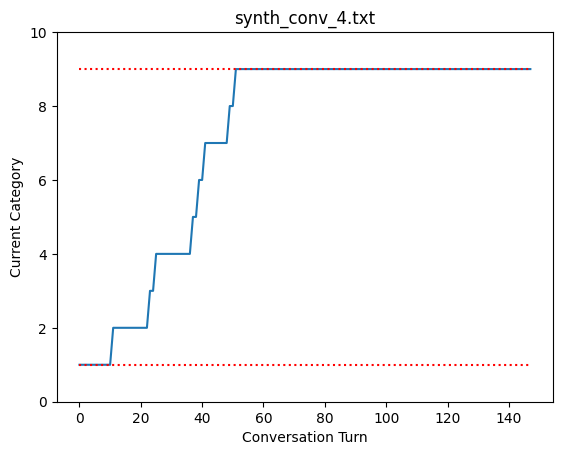

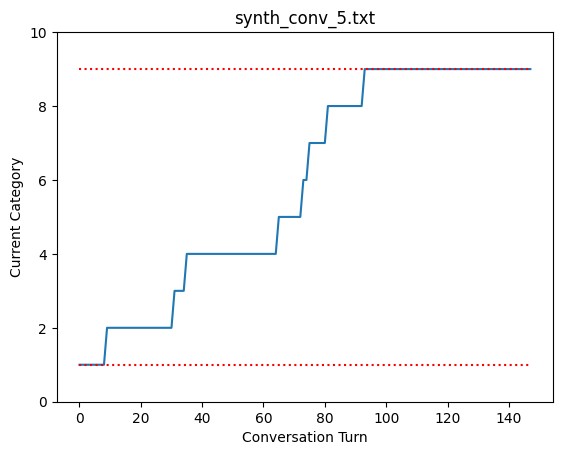

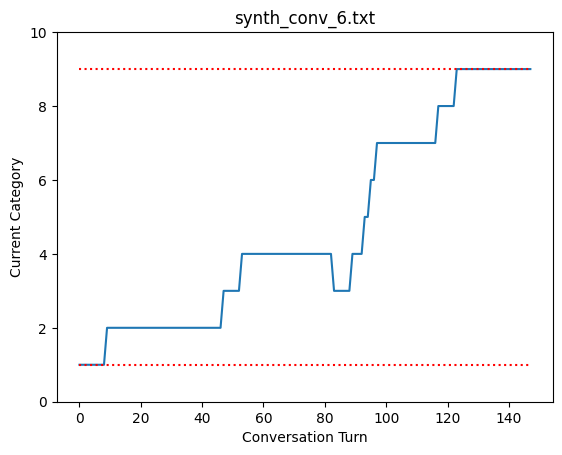

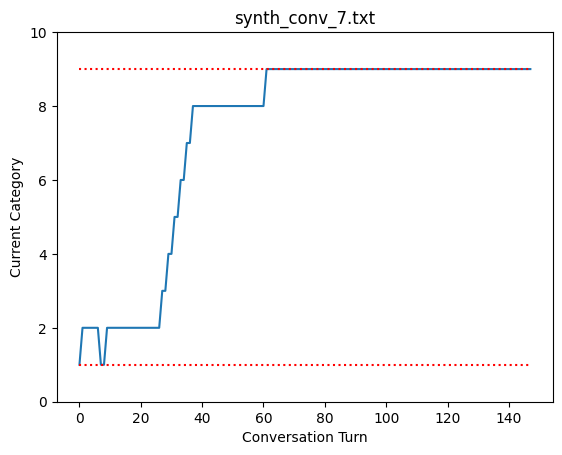

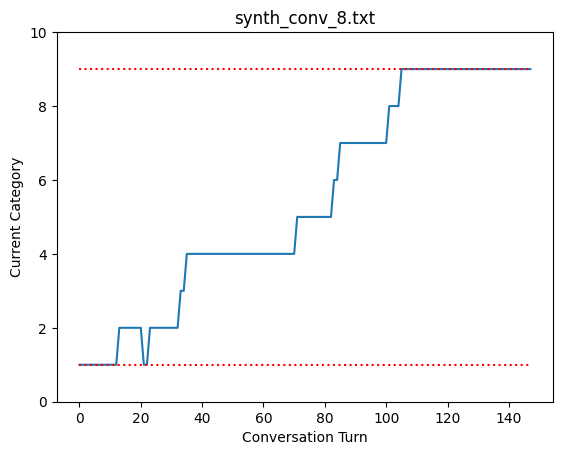

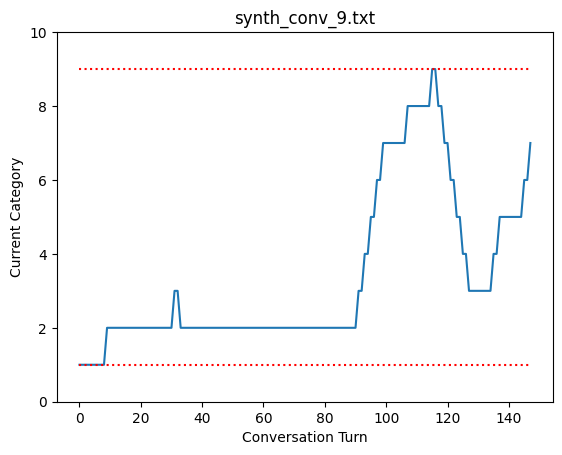

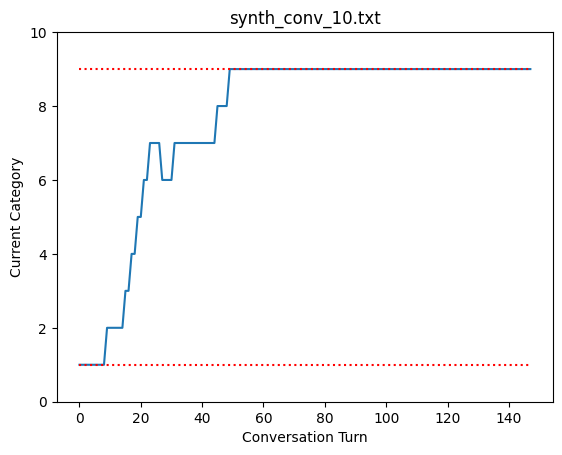

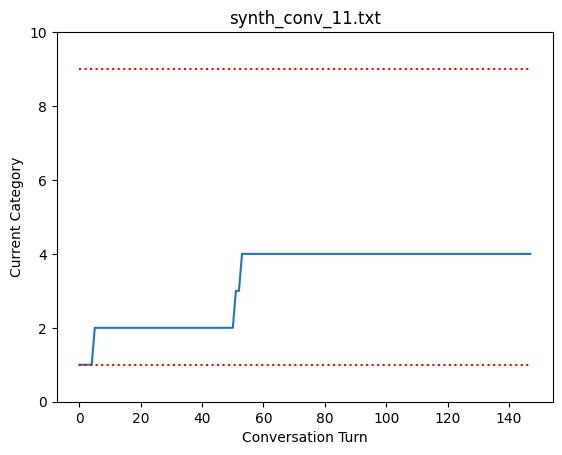

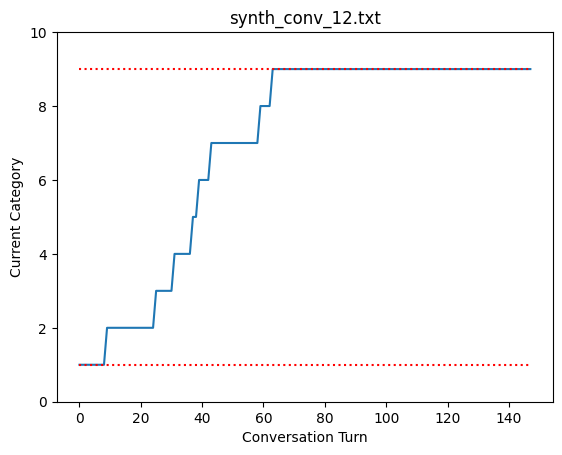

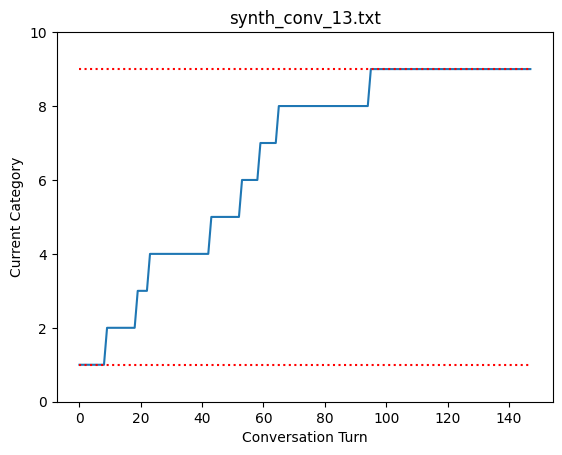

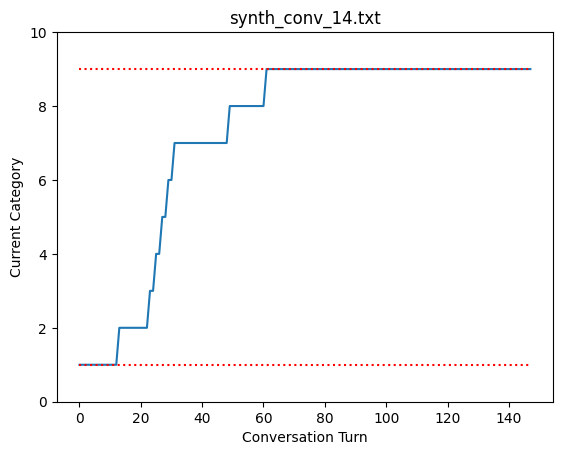

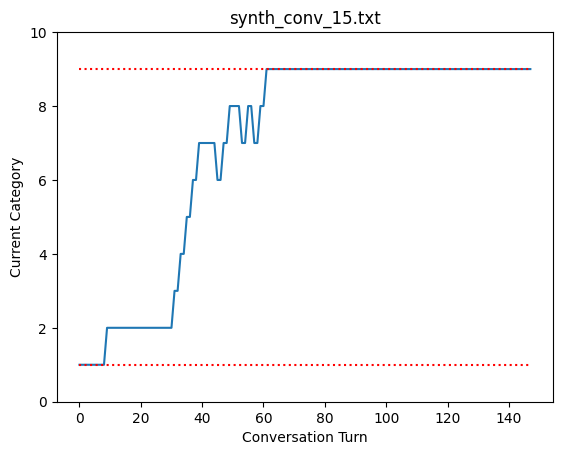

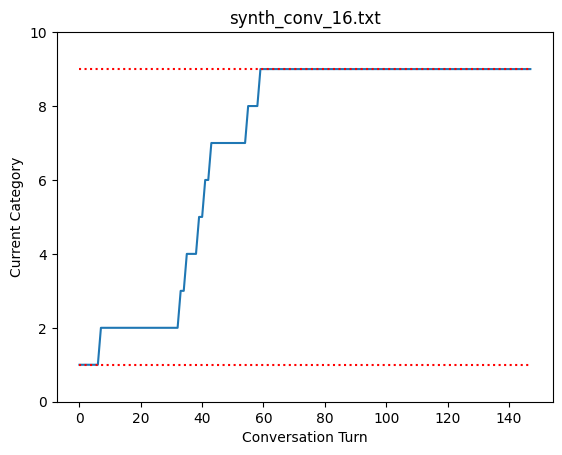

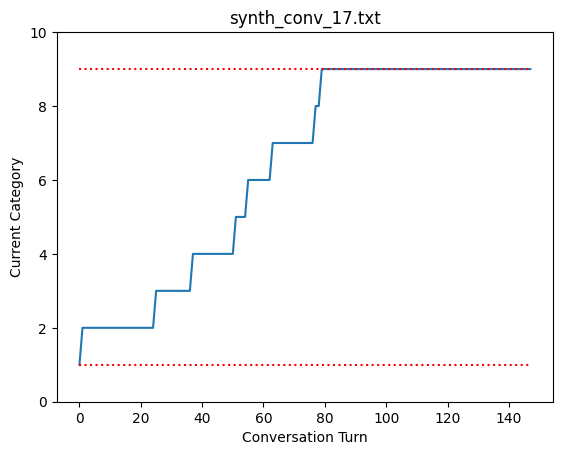

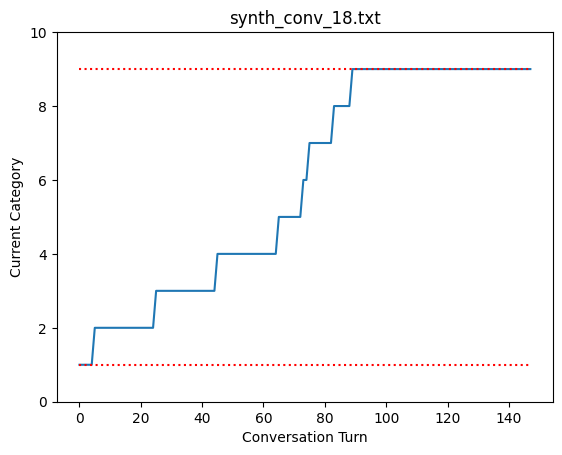

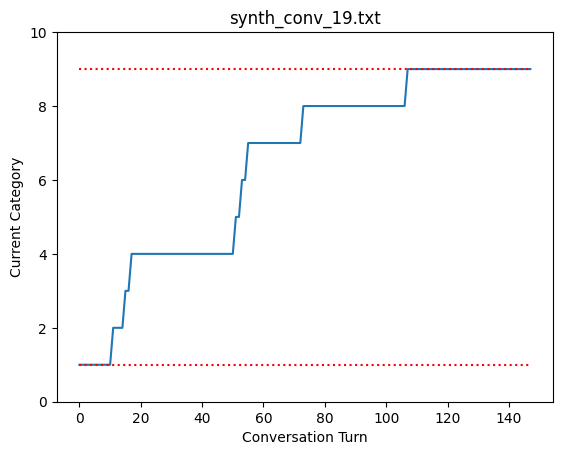

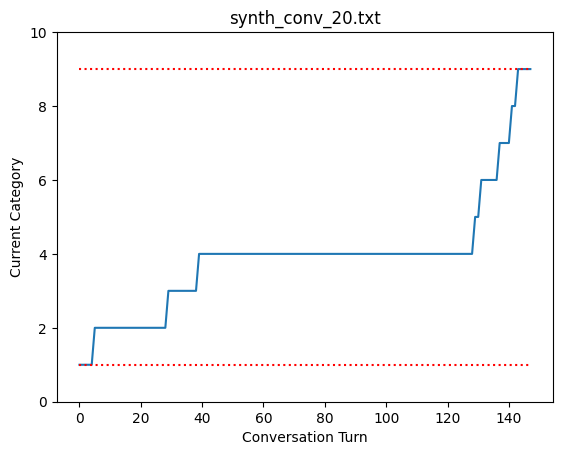

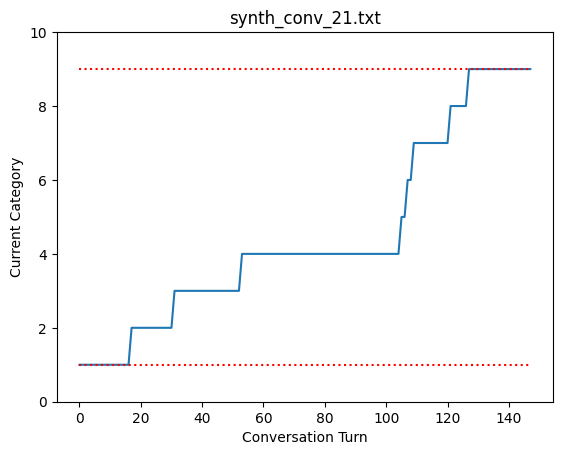

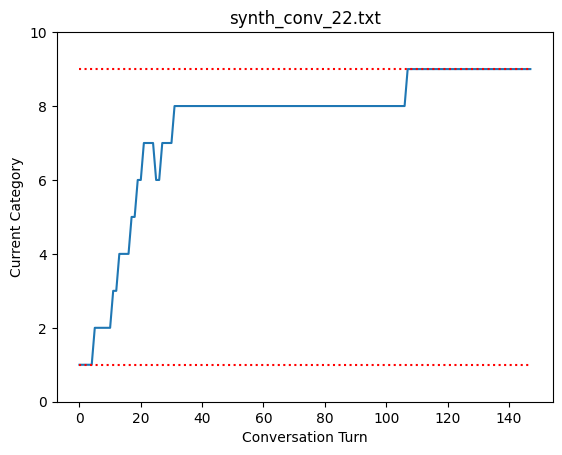

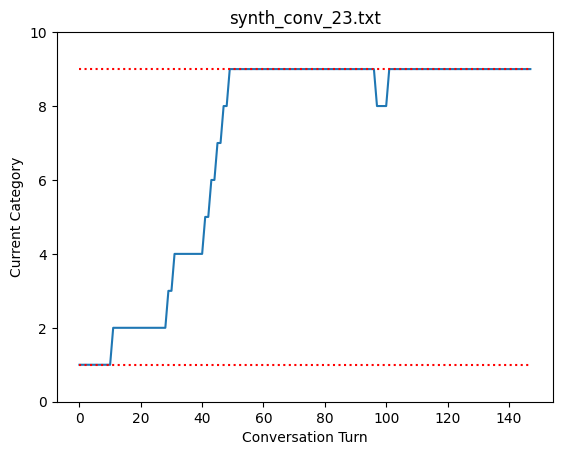

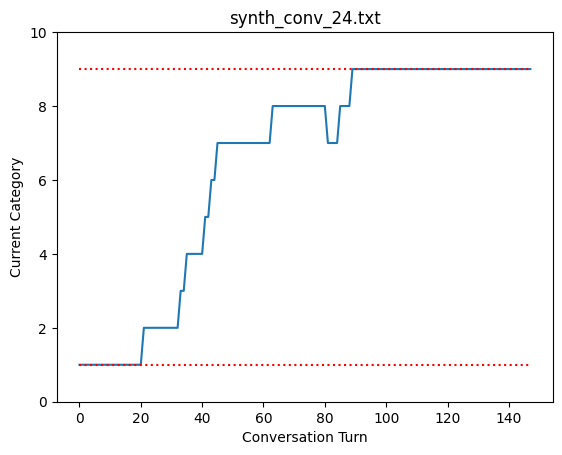

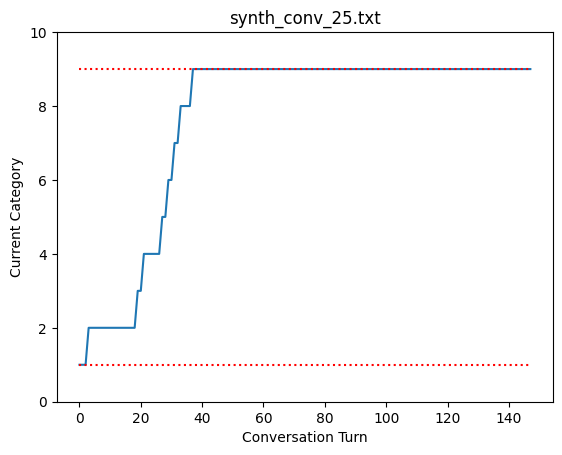

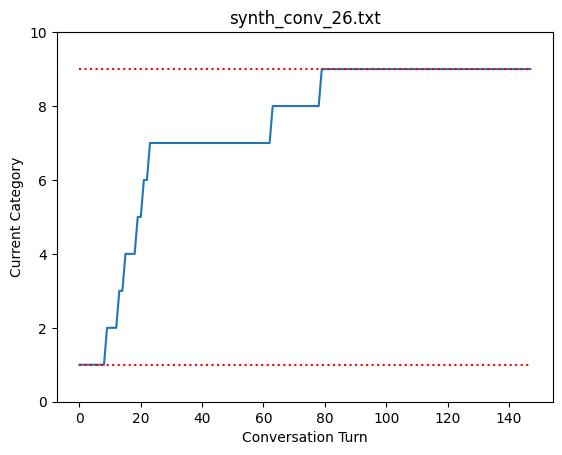

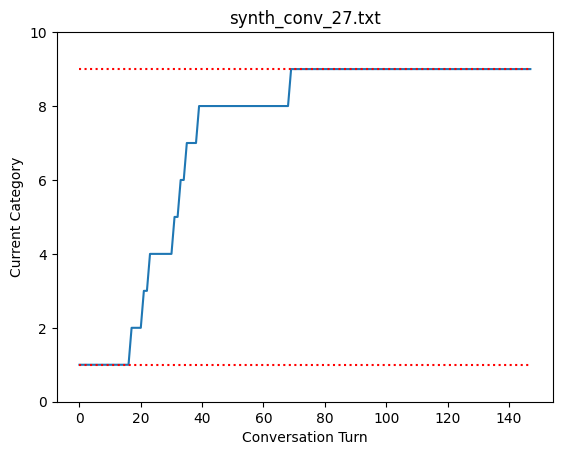

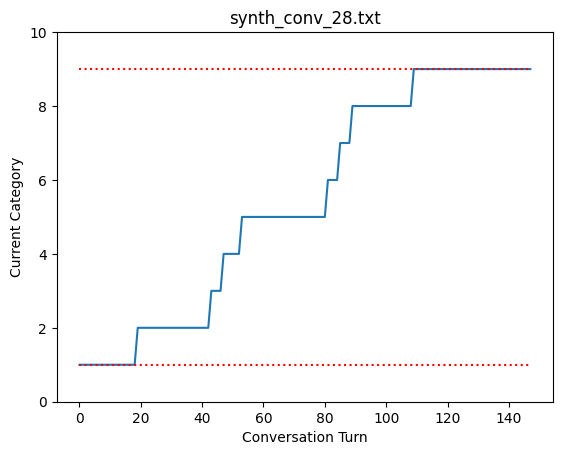

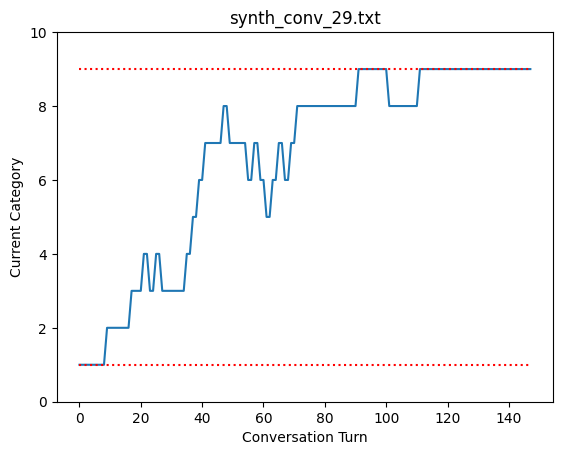

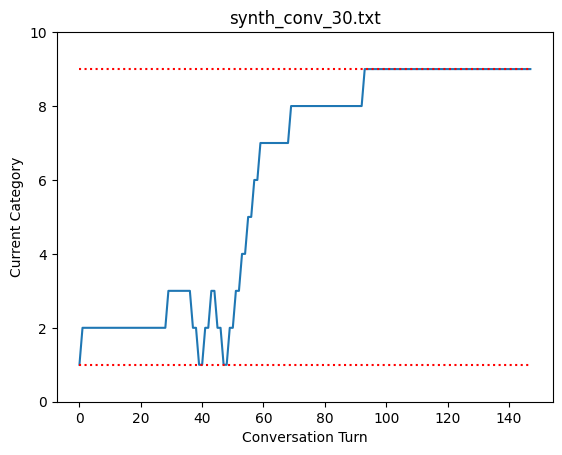

In [81]:
#fig, ax = plt.subplots(figsize=(8,8))
#ax.set_title("All Conversations Together")
#ax.set_xlabel('Conversation Turn')
#ax.set_ylabel('Current Category')
all_states = []
for fn in os.listdir('./'):
    if '.txt' in fn:
        lines = open(f'./{fn}', 'r').readlines()

        convo_states = []
        for line in lines:

            if 'state' in line[:6]:
                states = line.split(': ')[-1]
                states = eval(states)# states.strip('][').split(', ')
                # print(states)
                convo_states += states
        plt.plot([int(s[1]) for s in convo_states])
        plt.ylim((0,10))
        plt.plot([9 for x in range(len(convo_states))], linestyle=':', color='red')
        plt.plot([1 for x in range(len(convo_states))], linestyle=':', color='red')
        plt.title(fn)
        plt.xlabel("Conversation Turn")
        plt.ylabel("Current Category")
        plt.show()
        #ax.plot([int(s[1]) for s in convo_states])
        all_states.append(convo_states)
    
#plt.show()

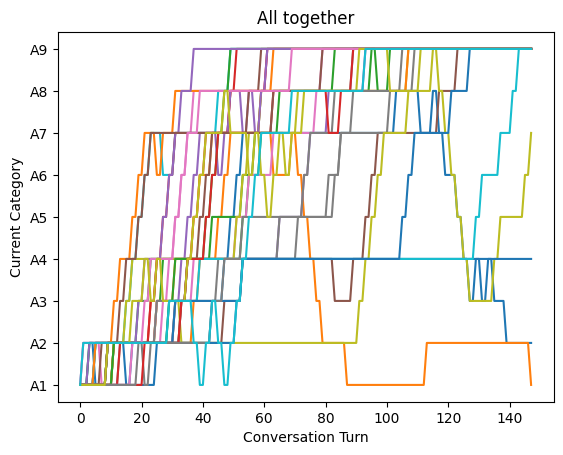

In [72]:
plt.title('All together')
plt.xlabel("Conversation Turn")
plt.ylabel("Current Category")
for y in all_states:
    plt.plot(y)    
plt.show()

In [39]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X.shape)
print(diabetes_y.shape)

(442, 10)
(442,)


(148, 2)
(148,)
(148,)
Coefficients: 
 [ 0.11858147 -0.00035702]
Mean squared error: 1.27
Coefficient of determination: 0.87


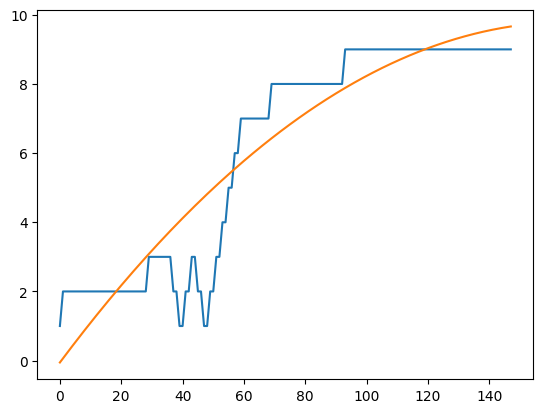

In [69]:
inst_idx = 29

x_numbers = np.array([[x, np.power(x, 2)] for x in range(len(all_states[inst_idx]))])
print(x_numbers.shape)
y_numbers = np.array([int(all_states[inst_idx][x[0]][1]) for x in x_numbers])# [[y[x][1] for y in all_states] for x in x_numbers]
print(y_numbers.shape)

regr = linear_model.LinearRegression()
regr.fit(x_numbers, y_numbers)

y_pred = regr.predict(x_numbers)
print(y_pred.shape)
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_numbers, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_numbers, y_pred))

plt.plot(y_numbers)
plt.plot([x[0] for x in x_numbers], y_pred)
plt.show()

# Plot all in './out_good'

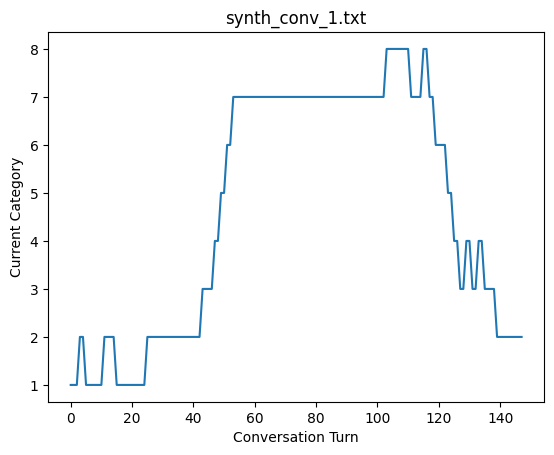

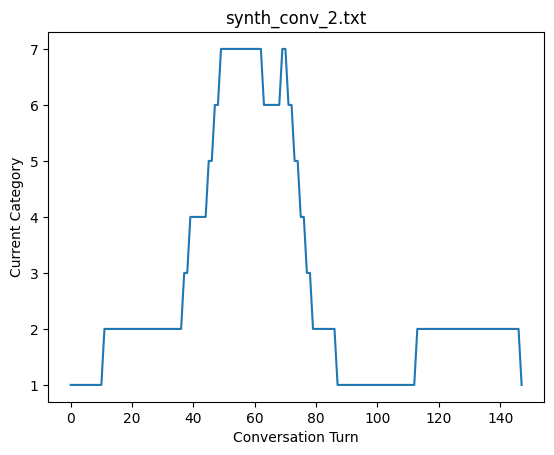

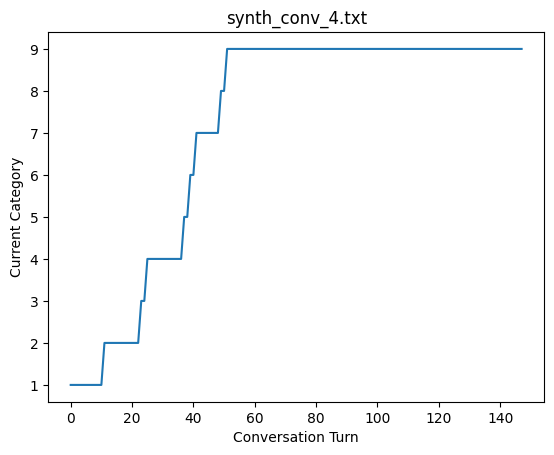

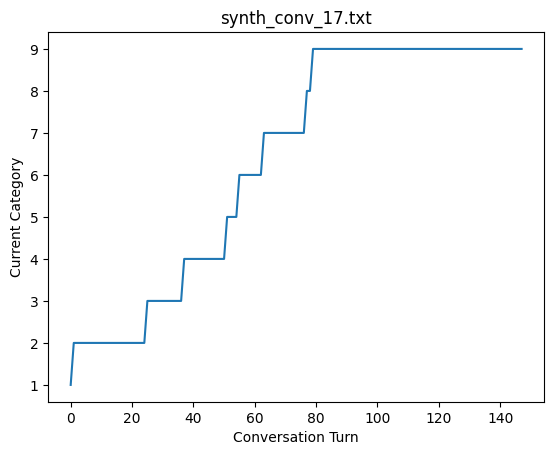

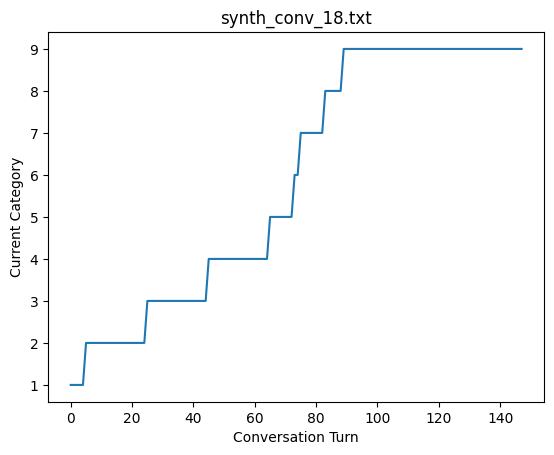

In [73]:
all_states = []
for fn in os.listdir('../out_good/'):
    if '.txt' in fn:
        lines = open(f'./{fn}', 'r').readlines()

        convo_states = []
        for line in lines:

            if 'state' in line[:6]:
                states = line.split(': ')[-1]
                states = eval(states)# states.strip('][').split(', ')
                # print(states)
                convo_states += states
        plt.plot([int(s[1]) for s in convo_states])
        plt.title(fn)
        plt.xlabel("Conversation Turn")
        plt.ylabel("Current Category")
        plt.show()
        # ax.plot([int(s[1]) for s in convo_states])
        all_states.append(convo_states)